## Observations and Insights 

For 45 days, ten anti-cancer drugs were tested on a cohort of 248 mice. 
Four of the drugs - Capomulin, Ramicane, Infubinol and Ceftamin are the basis of this analysis.
A positive correelatiojn between participant weight and tumor size was apparent, this also correlated with age as expected.
There was very little disparity between male and female participant 
Ceapomulin was the most successful drug with metastisised sites lower, tumor reduction higher and overall and increased age of participants compared to other drugs. Ramicane had improved results, seconmdary to Capomulin, a reduced metsatisis rather than tumor size was noted with use of this drug particularly.
There was a higher participant rate for Capomulin compared to other drugs, this could possibly have afgfected results if the difference wasnt as considerable. Irregardless of this larger test sample, Capomulin saw consistent success rates over and above other drugs.
Infubinol seeemed to be the least effective administered drug, with tumor sizing nearly 50% larger than Capomulin, Ceftamin saw an increase metastis rate.


In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
#Read the study results
study_results = pd.read_csv(study_results)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
df.shape

(1893, 8)

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_df = pd.DataFrame(duplicate)
dup_df

,0
0,g989


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = df[df['Mouse ID'] == "g989"]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2 = df[df['Mouse ID'].isin(duplicate)==False]
df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dup_df = df2[df2['Mouse ID'].isin(dup_df)==False]
# Display the data table for preview
no_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Create a DataFrame that resets index, with 'Mouse ID' as a column for future usage.
no_dup_df = pd.DataFrame(df2)
# Checking the number of mice in the clean DataFrame.
no_dup_df['Mouse ID'].value_counts()

s508    10
y163    10
a897    10
i901    10
k862    10
        ..
u153     1
n482     1
h428     1
t573     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tvol = df2.groupby(['Drug Regimen'])
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tvol_mean = tvol['Tumor Volume (mm3)'].mean()
tvol_med = tvol['Tumor Volume (mm3)'].median()
tvol_var = tvol['Tumor Volume (mm3)'].var()
tvol_std = tvol['Tumor Volume (mm3)'].std()
tvol_sem = tvol['Tumor Volume (mm3)'].sem()

tvol_df = pd.DataFrame({
                        "Mean" : tvol_mean, 
                        "Median" : tvol_med,
                        "Variance" : tvol_var,
                        "Standard Deviation" : tvol_std,
                        "SEM" : tvol_sem
                        })
tvol_df.head()



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_tumor_df = df2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_tumor_df
# This method produces everything in a single groupby function


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

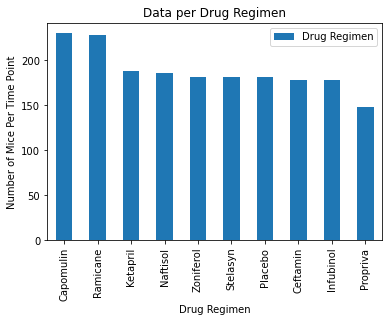

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drugs = pd.DataFrame(pd.value_counts(df2["Drug Regimen"]))
%matplotlib inline

# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# pandas plot
drugs.plot(kind = "bar")
plt.title("Data per Drug Regimen")
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

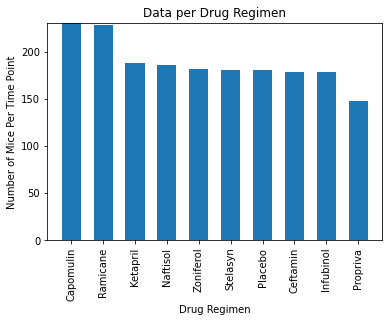

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs = pd.DataFrame(pd.value_counts(df2["Drug Regimen"]))
%matplotlib inline

#Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot
x_axis = df2["Drug Regimen"].value_counts().index
y_axis = df2["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis, width = .6)
plt.xticks(x_axis, rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+0.4)
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.title("Data per Drug Regimen")
plt.show()


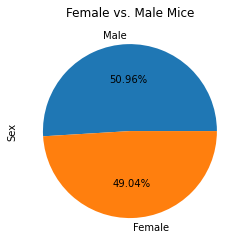

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = df2["Sex"].value_counts()
plt.title("Female vs. Male Mice")
sex.plot.pie(autopct= "%1.2f%%")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

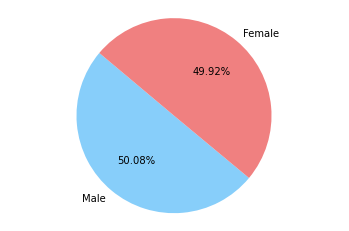

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Matplotlib
plt.axis("equal")
sizes = [325, 324]
plt.pie(
    sizes, 
    labels=["Male","Female"],          
    colors=["lightskyblue","lightcoral"],
    autopct='%1.2f%%',                                         
    startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.show

## Quartiles, Outliers and Boxplots

In [16]:
# Start by getting the last (greatest) timepoint for each mouse
max = df2.groupby(['Mouse ID'])['Timepoint'].max()
max_df = pd.DataFrame(max)
max_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [17]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined = pd.merge(df2, max_df, on=['Mouse ID', 'Timepoint'], how='right')
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ket = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for df2, row in combined.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ket.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
#created a data frame with the tumor data of the drugs listed.
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ket,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
# drug_df2 = pd.merge(drug_df_min, drug_df_max)
drug_df 


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined[combined["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0


In [20]:
# Start by getting the last (greatest) timepoint for each mouse
drug_time = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
drug_time = drug_time.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)
    

Capomulin
Ramicane
Infubinol
Ceftamin


In [21]:

treatment = 0
for drug in drug_list:
    quartiles = drug_time[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lowerb = round(lowerq - (1.5*iqr),2)
    upperb = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lowerb} could be {drug} outliers.")
    print(f"Values above {upperb} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1



------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

In [40]:
# created dataframe using .loc() of the drug regimine Capomulin using a boolean
cap_df = combined.loc[combined["Drug Regimen"] == "Capomulin",:]
# use groupby() and mean() to create a dataframe
avg_capm_vol = cap_df.groupby(['Mouse ID']).mean()
capomulin_df = pd.DataFrame(capavg)
capomulin_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9,22,45,38.982878,2
b742,7,21,45,38.939633,0
f966,16,17,20,30.485985,0
g288,3,19,45,37.074024,1
g316,22,22,45,40.159220,2
i557,1,24,45,47.685963,1
i738,23,20,45,37.311846,2
j119,7,23,45,38.125164,1
j246,21,21,35,38.753265,1


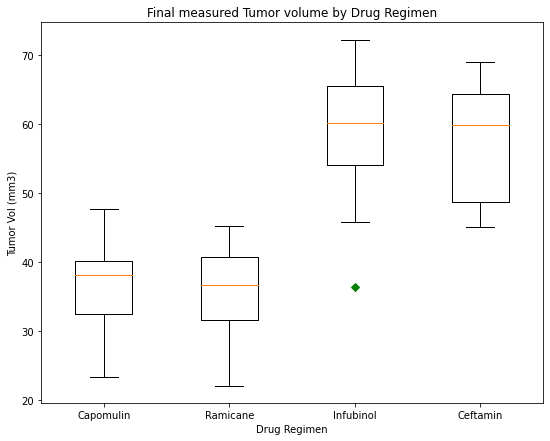

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]
# used plt.subplots to define size
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen') #set title
ax.set_xlabel('Drug Regimen') # set x label
ax.set_ylabel('Tumor Vol (mm3)') #set y lable
# used ax.boxplot function and ran the parameter boxplot_list to create the boxplot
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments) # set labels of each boxplot
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [42]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


Text(0, 0.5, 'Tumor Volume (mm3)')

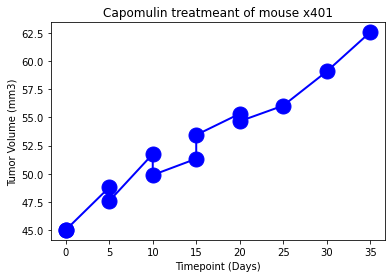

In [43]:
line_df = df[df['Mouse ID'] == "g989"]
line_df.head()
x_axis = line_df["Timepoint"]
tsize = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse x401')
plt.plot(x_axis, tsize,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

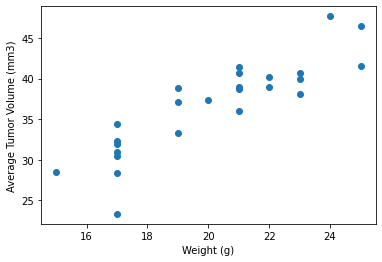

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9,22,45,38.982878,2
b742,7,21,45,38.939633,0
f966,16,17,20,30.485985,0
g288,3,19,45,37.074024,1
g316,22,22,45,40.159220,2
i557,1,24,45,47.685963,1
i738,23,20,45,37.311846,2
j119,7,23,45,38.125164,1
j246,21,21,35,38.753265,1


In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()
capavg

## Correlation and Regression

In [49]:
#Calculate the correlation and regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.88


In [50]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:1.750468228958504
intercept:1.4481469525549002
rvalue (Correlation coefficient):0.8767060403658119
pandas (Correlation coefficient):0.88
stderr:0.20026513236453639
y = 1.75x + 1.45


The r-squared is: 0.7686134812139006


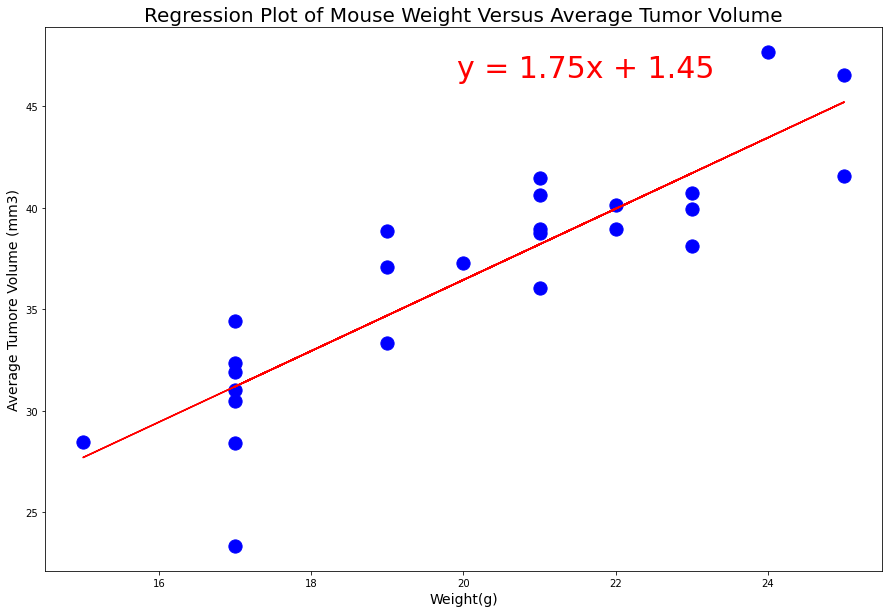

In [52]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/linear_regression.png", bbox_inches = "tight")
plt.show()